## Data Preperation Notebook

## Data Cleanup

### Removing Corrupt Images

#### Variables and Paths

In [1]:
DATA = "./DATA/"
META_DATA = f"{DATA}images.csv/"
IMAGES = f"{DATA}images_compressed/"

hf_token = ""
model_name = "meta-llama/Llama-3.2-11b-Vision-Instruct"

#### All the imports

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image as PIL_Image
from PIL import Image

from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import multiprocessing


import torch
from transformers import MllamaForConditionalGeneration, MllamaProcessor


#### Clean Corrupt Images

In [5]:
def is_image_corrupt(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return False
    except (IOError, SyntaxError, Image.UnidentifiedImageError):
        return True

def find_corrupt_images(folder_path):
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) 
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    num_cores = multiprocessing.cpu_count()
    with ProcessPoolExecutor(max_workers=num_cores) as executor:
        results = executor.map(is_image_corrupt, image_files)
    
    corrupt_images = [img for img, is_corrupt in zip(image_files, results) if is_corrupt]
    return corrupt_images


folder_path = IMAGES  # Replace with your folder path
corrupt_images = find_corrupt_images(folder_path)

print("Corrupt images:")
for img in corrupt_images:
    print(img)
print(f"Total corrupt images found: {len(corrupt_images)}")

Corrupt images:
./DATA/images_compressed/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg
./DATA/images_compressed/784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg
./DATA/images_compressed/b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
./DATA/images_compressed/1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
./DATA/images_compressed/c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
./DATA/images_compressed/040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg
Total corrupt images found: 6


In [6]:
corrupt_images

['./DATA/images_compressed/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg',
 './DATA/images_compressed/784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg',
 './DATA/images_compressed/b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg',
 './DATA/images_compressed/1d0129a1-f29a-4a3f-b103-f651176183eb.jpg',
 './DATA/images_compressed/c60e486d-10ed-4f64-abab-5bb698c736dd.jpg',
 './DATA/images_compressed/040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg']

In [7]:
df = pd.read_csv("./DATA/images.csv")
df.head()

image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [8]:
corrupt_filenames = [os.path.splitext(os.path.basename(path))[0] for path in corrupt_images]

# Print out the corrupt filenames for verification
print("Corrupt filenames:")
print(corrupt_filenames)

Corrupt filenames:
['d028580f-9a98-4fb5-a6c9-5dc362ad3f09', '784d67d4-b95e-4abb-baf7-8024f18dc3c8', 'b72ed5cd-9f5f-49a7-b12e-63a078212a17', '1d0129a1-f29a-4a3f-b103-f651176183eb', 'c60e486d-10ed-4f64-abab-5bb698c736dd', '040d73b7-21b5-4cf2-84fc-e1a80231b202']


In [9]:
df_clean = df[~df['image'].isin(corrupt_filenames)]
# Print the number of rows removed
print(f"Number of rows removed: {len(df) - len(df_clean)}")

# Display the first few rows of the cleaned DataFrame
print(df_clean.head())

Number of rows removed: 5
                                  image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False


In [10]:
df_clean.to_csv('clean.csv', index=False)

## EDA

In [11]:
df = pd.read_csv("./clean.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      5398 non-null   object
 1   sender_id  5398 non-null   int64 
 2   label      5398 non-null   object
 3   kids       5398 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 131.9+ KB


In [13]:
df.head()

image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [14]:
# Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
image        0
sender_id    0
label        0
kids         0
dtype: int64


In [15]:
print("\nUnique labels:")
print(df['label'].nunique())
print("\n Label Distribution:")
print(df['label'].value_counts())


Unique labels:
20

 Label Distribution:
label
T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip             7
Name: count, dtype: int64


In [16]:
print("\nDistribution of kids vs. non-kids images:")
print(df['kids'].value_counts(normalize=True))


Distribution of kids vs. non-kids images:
kids
False    0.911819
True     0.088181
Name: proportion, dtype: float64


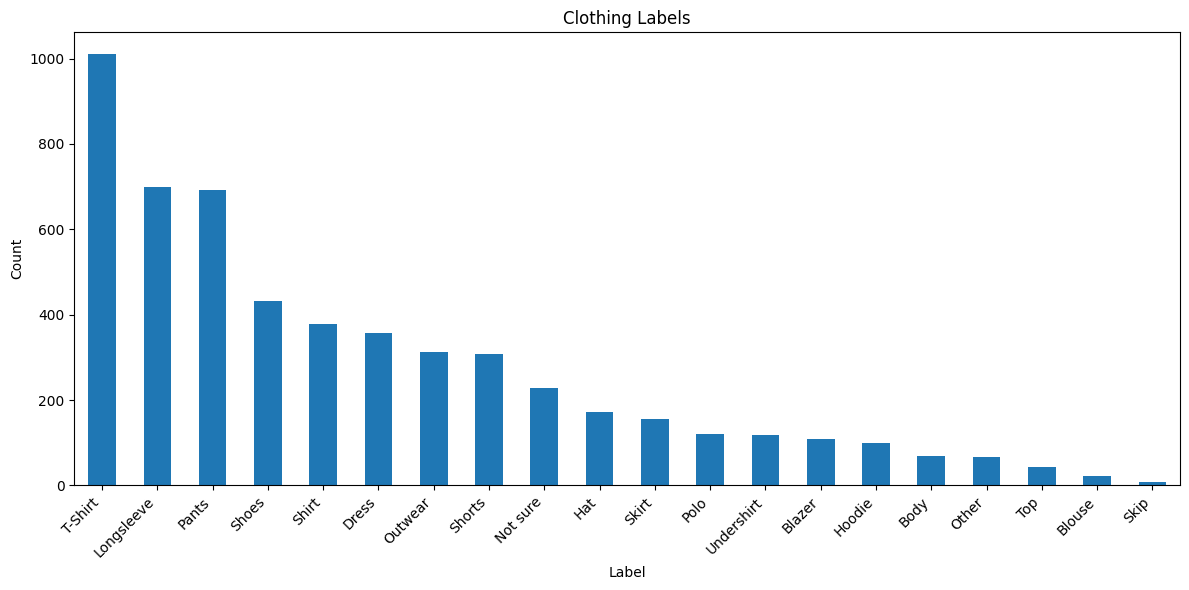

In [17]:
plt.figure(figsize=(12, 6))
df['label'].value_counts().head(20).plot(kind='bar')
plt.title('Clothing Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
df_no_kids = df[df['kids'] == False]
df_cleaned = df_no_kids.drop('kids', axis=1)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (5398, 4)
Cleaned dataset shape: (4922, 3)


In [19]:
df = df_cleaned
df

image  sender_id       label
0     4285fab0-751a-4b74-8e9b-43af05deee22        124    Not sure
1     ea7b6656-3f84-4eb3-9099-23e623fc1018        148     T-Shirt
2     00627a3f-0477-401c-95eb-92642cbe078d         94    Not sure
3     ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43     T-Shirt
4     3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189       Shoes
...                                    ...        ...         ...
5391  9bdac063-6c07-4bfc-a04a-e45224c503df        204  Undershirt
5393  dfd4079d-967b-4b3e-8574-fbac11b58103        204      Shorts
5395  5379356a-40ee-4890-b416-2336a7d84061        310      Shorts
5396  65507fb8-3456-4c15-b53e-d1b03bf71a59        204       Shoes
5397  32b99302-cec7-4dec-adfa-3d4029674209        204       Skirt

[4922 rows x 3 columns]

In [20]:
category_mapping = {
    'T-Shirt': 'T-Shirt',
    'Shoes': 'Shoes',
    'Top': 'Tops',
    'Blouse': 'Tops',
    'Shirt': 'Tops',
    'Polo': 'Tops',
    'Longsleeve': 'Tops',
    'Pants': 'Pants',
    'Jeans': 'Jeans',
    'Shorts': 'Shorts',
    'Skirt': 'Skirts',
    'Dress': 'Skirts',
    'Footwear': 'Shoes',
    'Outwear': 'Tops',
    'Hat': 'Tops',
    'Undershirt': 'T-Shirt',
    'Body': 'Tops',
    'Hoodie': 'Tops',
    'Blazer': 'Tops'
}

df_cleaned['merged_category'] = df_cleaned['label'].map(category_mapping).fillna('Other')

# Print the unique categories after merging
print("Unique categories after merging:")
print(df_cleaned['merged_category'].unique())

Unique categories after merging:
['Other' 'T-Shirt' 'Shoes' 'Shorts' 'Tops' 'Pants' 'Skirts']


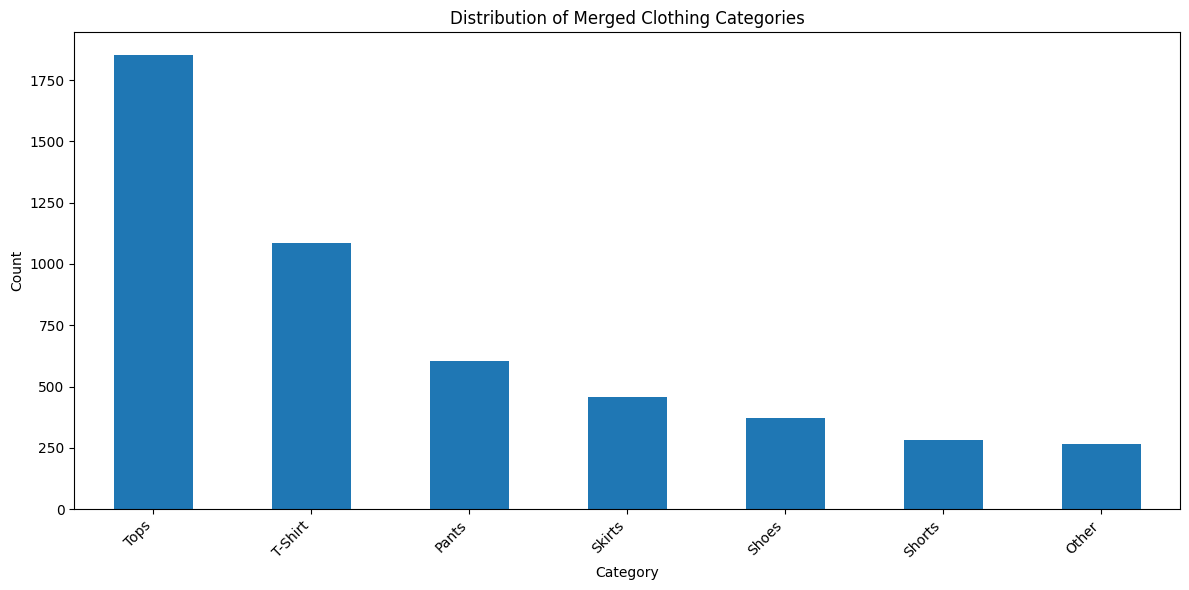

In [21]:
plt.figure(figsize=(12, 6))
df_cleaned['merged_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Merged Clothing Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
def balance_category(group):
    if len(group) > 500:
        return group.sample(n=500, random_state=42)
    return group


df_balanced = df_cleaned.groupby('merged_category').apply(balance_category).reset_index(drop=True)

# Print the count of each category in the balanced dataset
print("\nCategory counts in the balanced dataset:")
print(df_balanced['merged_category'].value_counts())


Category counts in the balanced dataset:
merged_category
Pants      500
T-Shirt    500
Tops       500
Skirts     457
Shoes      371
Shorts     284
Other      266
Name: count, dtype: int64


/tmp/ipykernel_2065289/1389168415.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_cleaned.groupby('merged_category').apply(balance_category).reset_index(drop=True)


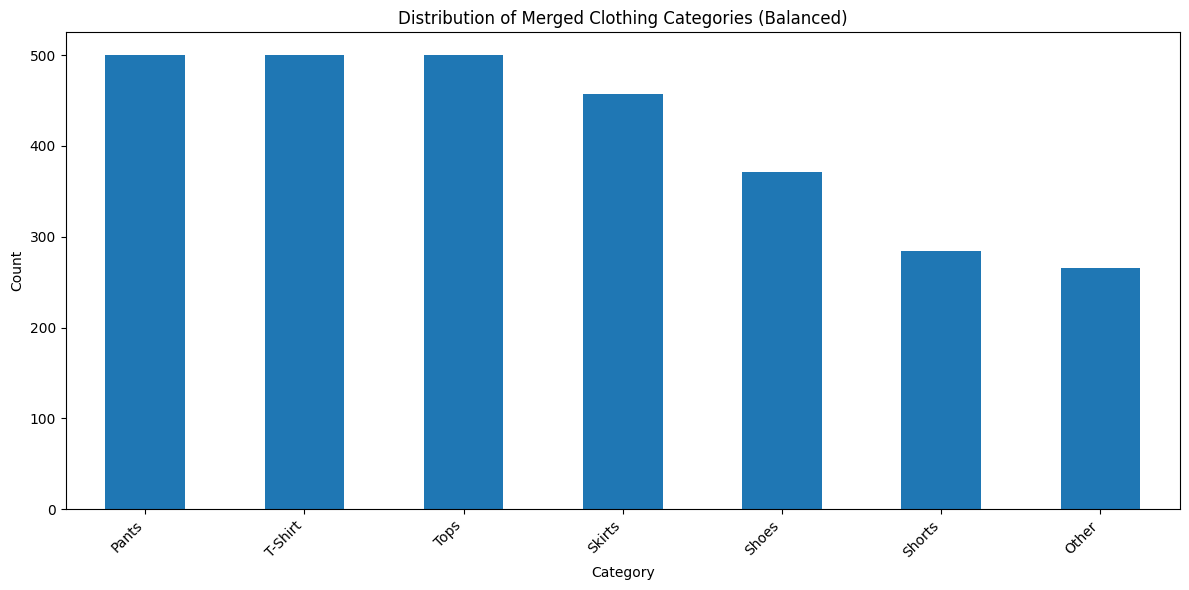

Balanced dataset shape: (2878, 4)
merged_category
Pants      500
T-Shirt    500
Tops       500
Skirts     457
Shoes      371
Shorts     284
Other      266
Name: count, dtype: int64


In [23]:
# Plot the distribution of the balanced dataset
plt.figure(figsize=(12, 6))
df_balanced['merged_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Merged Clothing Categories (Balanced)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Balanced dataset shape: {df_balanced.shape}")
print(df_balanced['merged_category'].value_counts())

In [24]:
# Save the balanced dataset
df_balanced.to_csv('balanced_dataset.csv', index=False)

## Synthetic Labelling using Llama 3.2

In [25]:
model = MllamaForConditionalGeneration.from_pretrained(model_name, device_map="auto", torch_dtype=torch.bfloat16, token=hf_token)
processor = MllamaProcessor.from_pretrained(model_name, token=hf_token)

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [41]:
#!ls {IMAGES}

In [27]:
image_path = f"{IMAGES}/01938e19-ece6-4f67-8e48-bfd6dd6ce399.jpg"

In [28]:
def get_image(image_path):
    with open(image_path, "rb") as f:
        return PIL_Image.open(f).convert("RGB")

image = get_image(image_path)

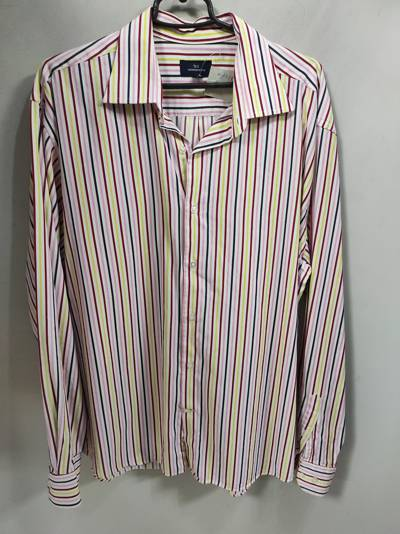

In [29]:
image

In [30]:
USER_TEXT = """
You are an expert fashion captioner, we are writing descriptions of clothes, look at the image closely and write a caption for it.

Write the following Title, Size, Category, Gender, Type, Description in JSON FORMAT, PLEASE DO NOT FORGET JSON, I WILL BE VERY SAD AND CRY

ALSO START WITH THE JSON AND NOT ANY THING ELSE, FIRST CHAR IN YOUR RESPONSE IS ITS OPENING BRACE, I WILL DRINK CHAI IF YOU FOLLOW THIS

FOLLOW THESE STEPS CLOSELY WHEN WRITING THE CAPTION: 
1. Only start your response with a dictionary like the example below, nothing else, I NEED TO PARSE IT LATER, SO DONT ADD ANYTHING ELSE-IT WILL BREAK MY CODE AND I WILL BE VERY SAD 
Remember-DO NOT SAY ANYTHING ELSE ABOUT WHAT IS GOING ON, just the opening brace is the first thing in your response nothing else ok?
2. REMEMBER TO CLOSE THE DICTIONARY WITH '}'BRACE, IT GOES AFTER THE END OF DESCRIPTION-YOU ALWAYS FORGET IT, THIS WILL CAUSE A FIRE ON A PRODUCTION SERVER BEING USE BY MILLIONS
3. If you cant tell the size from image, guess it! its okay but dont literally write that you guessed it
4. Do not make the caption very literal, all of these are product photos, DO NOT CAPTION HOW OR WHERE THEY ARE PLACED, FOCUS ON WRITING ABOUT THE PIECE OF CLOTHING
5. BE CREATIVE WITH THE DESCRIPTION BUT FOLLOW EVERYTHING CLOSELY FOR STRUCTURE
6. Return your answer in dictionary format, see the example below
7. Please do NOT add new lines or tabs in the JSON
8. I REPEAT DO NOT GIVE ME YOUR EXPLAINATION START WITH THE JSON

{"Title": "Title of item of clothing", "Size": {'S', 'M', 'L', 'XL'}, #select one randomly if you cant tell from the image. DO NOT TELL ME YOU ESTIMATE OR GUESSED IT ONLY THE LETTER IS ENOUGH", Category":  {T-Shirt, Shoes, Tops, Pants, Jeans, Shorts, Skirts, Shoes, Footwear}, "Gender": {M, F, U}, "Type": {Casual, Formal, Work Casual, Lounge}, "Description": "Write it here"}

Example: ALWAYS RETURN ANSWERS IN THE DICTIONARY FORMAT BELOW OK?

{"Title": "Casual White pant with logo on it", "size": "L", "Category": "Jeans", "Gender": "U", "Type": "Work Casual", "Description": "Write it here, this is where your stuff goes"} 
"""

In [34]:
USER_TEXT_OPTION_2 = """
You are an expert fashion captioner, we are writing descriptions of clothes, look at the image closely and write a caption for it.

Write the following Title, Size, Category, Gender, Type, Description in JSON FORMAT, PLEASE DO NOT FORGET JSON,

ALSO START WITH THE JSON AND NOT ANY THING ELSE, FIRST CHAR IN YOUR RESPONSE IS ITS OPENING BRACE

FOLLOW THESE STEPS CLOSELY WHEN WRITING THE CAPTION: 
1. Only start your response with a dictionary like the example below, nothing else, I NEED TO PARSE IT LATER, SO DONT ADD ANYTHING ELSE-IT WILL BREAK MY CODE
Remember-DO NOT SAY ANYTHING ELSE ABOUT WHAT IS GOING ON, just the opening brace is the first thing in your response nothing else ok?
2. REMEMBER TO CLOSE THE DICTIONARY WITH '}'BRACE, IT GOES AFTER THE END OF DESCRIPTION-YOU ALWAYS FORGET IT, THIS WILL CAUSE A LOT OF ISSUES
3. If you cant tell the size from image, guess it! its okay but dont literally write that you guessed it
4. Do not make the caption very literal, all of these are product photos, DO NOT CAPTION HOW OR WHERE THEY ARE PLACED, FOCUS ON WRITING ABOUT THE PIECE OF CLOTHING
5. BE CREATIVE WITH THE DESCRIPTION BUT FOLLOW EVERYTHING CLOSELY FOR STRUCTURE
6. Return your answer in dictionary format, see the example below

{"Title": "Title of item of clothing", "Size": {'S', 'M', 'L', 'XL'}, #select one randomly if you cant tell from the image. DO NOT TELL ME YOU ESTIMATE OR GUESSED IT ONLY THE LETTER IS ENOUGH", Category":  {T-Shirt, Shoes, Tops, Pants, Jeans, Shorts, Skirts, Shoes, Footwear}, "Gender": {M, F, U}, "Type": {Casual, Formal, Work Casual, Lounge}, "Description": "Write it here"}

Example: ALWAYS RETURN ANSWERS IN THE DICTIONARY FORMAT BELOW OK?

{"Title": "Casual White pant with logo on it", "size": "L", "Category": "Jeans", "Gender": "U", "Type": "Work Casual", "Description": "Write it here, this is where your stuff goes"} 
"""

In [37]:
conversation = [
        {"role": "user", "content": [{"type": "image"}, {"type": "text", "text": USER_TEXT}]}
    ]
prompt = processor.apply_chat_template(conversation, add_special_tokens=False, add_generation_prompt=True, tokenize=False)
inputs = processor(image, prompt, return_tensors="pt").to(model.device)
output = model.generate(**inputs, temperature=1, top_p=0.9, max_new_tokens=512)
processor.decode(output[0])[len(prompt):]

'end_header_id|>\n\n{"Title": "Striped Collared Shirt", "Size": "L", "Category": "Tops", "Gender": "F", "Type": "Casual", "Description": "This shirt features a classic design with thin vertical stripes in multiple colors, including red, blue, yellow, and green, giving it a fun and playful look. The collar and cuffs are both long, with the collar being open and unbuttoned, and the cuffs rolled up slightly. The buttons are small and round. The fabric appears to be lightweight, and the shirt appears to be slightly wrinkled, adding to its casual charm. The solid grey background of the image suggests a plain backdrop, and the dark shadows of the shirt hanging on a hanger indicate that it is a product photo. Overall, this shirt is perfect for a casual, everyday look, and its fun and playful pattern makes it a great addition to any wardrobe."}<|eot_id|>'

In [39]:
print(processor.decode(output[0])[len(prompt):])

end_header_id|>

{"Title": "Striped Collared Shirt", "Size": "L", "Category": "Tops", "Gender": "F", "Type": "Casual", "Description": "This shirt features a classic design with thin vertical stripes in multiple colors, including red, blue, yellow, and green, giving it a fun and playful look. The collar and cuffs are both long, with the collar being open and unbuttoned, and the cuffs rolled up slightly. The buttons are small and round. The fabric appears to be lightweight, and the shirt appears to be slightly wrinkled, adding to its casual charm. The solid grey background of the image suggests a plain backdrop, and the dark shadows of the shirt hanging on a hanger indicate that it is a product photo. Overall, this shirt is perfect for a casual, everyday look, and its fun and playful pattern makes it a great addition to any wardrobe."}<|eot_id|>


### Testing Labelling Script

In [43]:
hf_token = ""
model_name = "meta-llama/Llama-3.2-11b-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(model_name, device_map="auto", torch_dtype=torch.bfloat16, token=hf_token)
processor = MllamaProcessor.from_pretrained(model_name, token=hf_token)

# Define the input folder path
input_folder_path = IMAGES

# Define the output CSV file path
output_csv_file_path = "./captions_testing.csv"

# Create an empty list to store the results
results = []

# Loop through the first 50 files in the input folder
for filename in tqdm(os.listdir(input_folder_path)[:50], desc="Processing files"):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Get the image path
        image_path = os.path.join(input_folder_path, filename)

        # Load the image
        image = get_image(image_path)

        # Create a conversation
        conversation = [
            {"role": "user", "content": [{"type": "image"}, {"type": "text", "text": USER_TEXT}]}
        ]

        # Apply chat template and tokenize
        prompt = processor.apply_chat_template(conversation, add_special_tokens=False, add_generation_prompt=True, tokenize=False)
        inputs = processor(image, prompt, return_tensors="pt").to(model.device)

        # Generate the output
        output = model.generate(**inputs, temperature=1, top_p=0.9, max_new_tokens=512)

        # Decode the output
        decoded_output = processor.decode(output[0])[len(prompt):]

        # Append the result to the list
        results.append((filename, decoded_output))

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:31<00:00,  4.23s/it]


In [44]:
import csv
# Write the results to a CSV file
with open(output_csv_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["filename", "description"])
    for result in results:
        writer.writerow(result)

In [48]:
df = pd.read_csv("./captions_testing.csv")
df

filename  \
0   d7ed1d64-2c65-427f-9ae4-eb4aaa3e2389.jpg   
1   5c1b7a77-1fa3-4af8-9722-cd38e45d89da.jpg   
2   b2e084c7-e3a0-4182-8671-b908544a7cf2.jpg   
3   9d053b67-64e1-4050-a509-27332b9eca54.jpg   
4   d885f493-1070-4d51-bd11-f1ec156a2aa7.jpg   
5   87846aa9-86cc-404a-af2c-7e8fe941081d.jpg   
6   22745622-ae32-407f-9af1-9a25eb79d7b3.jpg   
7   04fa06fb-d71a-4293-9804-fe799375a682.jpg   
8   d9e84490-185d-48f9-ac16-4ef3360616d5.jpg   
9   79e8d176-99e8-4f89-88f5-d26d957405a2.jpg   
10  2125089e-61bc-4ec7-bba5-829e8e2fe268.jpg   
11  654c92f1-8751-411d-80d4-0c8115af28fc.jpg   
12  8f576f1a-839d-4fb2-a224-a4700b2d05da.jpg   
13  e976a8f6-6731-485f-8a9a-2872a5208818.jpg   
14  c6d71611-6bae-4645-8a93-959973e05f8b.jpg   
15  5e944547-5d37-4b1a-a544-64a250377e4d.jpg   
16  95d9e258-ef5b-4cfc-852a-c1f8308cf31f.jpg   
17  177a49f7-8796-45f5-9e3c-e66347db0fe0.jpg   
18  4719349a-06d4-4ddf-8428-69c6cef55e46.jpg   
19  bbf0d9c7-663d-46d1-a9f8-66e8e5678541.jpg   
20  e25a7faa-7a49-4e72-a7ef-e74427f77784.jpg   
21  d995ac1f-fbd0-482c-a308-dafb6a93cfd0.jpg   
22  f8eb9935-30b5-41a8-95dc-5f05dec84dc6.jpg   
23  248aa31e-1a4e-48e3-ac17-8f007a4cf139.jpg   
24  4d42474e-cc0c-4528-84ac-7a543ffa4ee2.jpg   
25  92f5cc49-20c0-4b60-a206-9f26e4b736a7.jpg   
26  eb93406f-20f2-4840-84e0-aa9febfb2580.jpg   
27  28936a35-8bc6-42b1-b7ed-a5d02aa994df.jpg   
28  0c224954-0e0f-4caa-82c8-cf9581e89336.jpg   
29  694e976e-13ee-4471-9f89-ca75244f9334.jpg   
30  b988510e-0b76-4b92-a748-5f650ec3cdaa.jpg   
31  123cedc9-f0ee-432b-a087-7c4981e60c75.jpg   
32  1ece3817-f6ca-46a2-b514-f2d3de572399.jpg   
33  e102d2b6-60a1-427c-94d2-8ab6876cce30.jpg   
34  5b32191d-85d4-4990-b419-ae928b56597b.jpg   
35  58caa9fd-a3df-44ac-b296-05dbd8d02d47.jpg   
36  5f046ec9-4a0c-4c31-a80a-8f71f494d295.jpg   
37  f7aacbe8-e055-44ea-9eeb-ab89940dd5cb.jpg   
38  049e77f5-2a28-457a-9d27-2edb3da2fd7f.jpg   
39  72647815-0e0d-4e4b-b320-0ac57d0f1cf4.jpg   
40  e612e27f-8be5-4dd2-a667-24ed31b3a2ac.jpg   
41  c43bcf77-b542-4c9a-a8b3-580e873c2baf.jpg   
42  77f0e079-e833-4ce9-8220-1142e57de747.jpg   
43  be0c33d8-bb30-47a8-a9d8-3ffef3bf5b95.jpg   
44  4cc0191c-175d-48e1-9808-ffbb7ea7ac57.jpg   
45  5ddd23ad-e060-4e8a-a5ef-f7d3179567ff.jpg   
46  43ac2647-95bc-4174-b9c1-0518a5024ed2.jpg   
47  3203d295-92c2-445d-a8de-9423b58ffb66.jpg   
48  24f57638-6748-4f65-8fff-747fac6d003c.jpg   
49  ad0352de-3584-4ed7-8e80-083908297db8.jpg   

                                          description  
0   end_header_id|>\n\n**"A celestial-inspired des...  
1   end_header_id|>\n\n{"Title": "White Sweater", ...  
2   end_header_id|>\n\n{"Title": "Simple Gray T-Sh...  
3   end_header_id|>\n\n{ "Title": "Summer Short Je...  
4   end_header_id|>\n\nI cannot provide a response...  
5   end_header_id|>\n\nI cannot provide a response...  
6   end_header_id|>\n\n{"Title": "Fitted Baby Cap"...  
7   end_header_id|>\n\nHere is the caption for the...  
8   end_header_id|>\n\nHere is the description of ...  
9   end_header_id|>\n\n{"Title": "A t-shirt with a...  
10  end_header_id|>\n\nI cannot provide a response...  
11  end_header_id|>\n\n{"Title": "Red Beanie", "Si...  
12  end_header_id|>\n\n{"Title": "Long Sleeve Shir...  
13  end_header_id|>\n\n{"Title": "Olive Green T-Sh...  
14  end_header_id|>\n\n**Product Description**\n\n...  
15  end_header_id|>\n\nI can't assist with that re...  
16  end_header_id|>\n\n**Title:** "Playful Cat Pri...  
17  end_header_id|>\n\n{"Title": "White top with f...  
18  end_header_id|>\n\n{"Title": "Rainbow Dress", ...  
19  end_header_id|>\n\n{"Title": "White Long-sleev...  
20  end_header_id|>\n\nI cannot identify the size ...  
21  end_header_id|>\n\n{"Title": "Off-White Boatne...  
22  end_header_id|>\n\n{ \n    "Title": "Gray and ...  
23  end_header_id|>\n\n{"Title": "Business Pants",...  
24  end_header_id|>\n\n{"Title": "Rugby Shirt", "S...  
25  end_header_id|>\n\n{"Title": "Rose Blouse with...  
26  end_header_id|>\n\n{"Title": "Pink t-shirt dre...  
27  end_header_id|>

In [46]:
#fin